In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from xgboost import XGBRegressor
!pip install scikit-learn
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import ShuffleSplit, cross_val_score

In [2]:
data = pd.read_csv('insurance.csv')

print(data.info())
print(data.describe())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


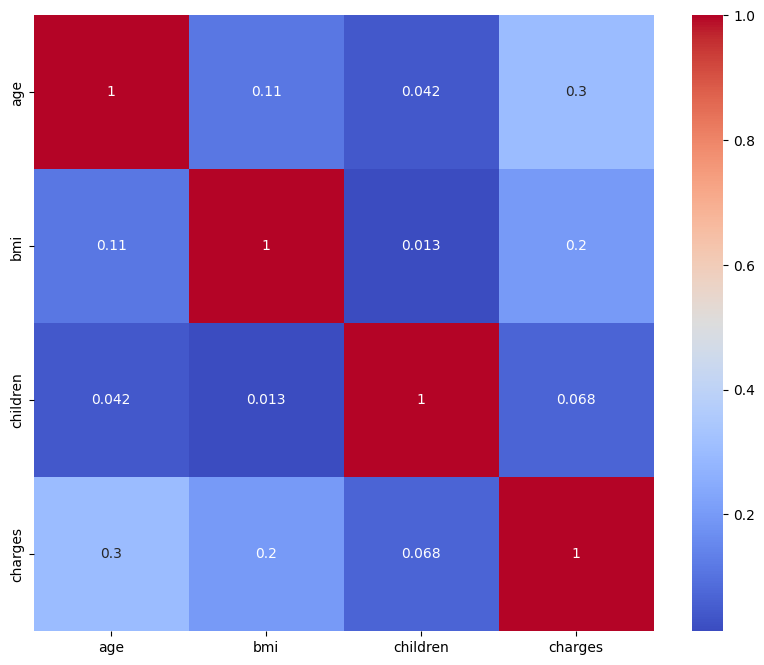

In [3]:
print(data.isnull().sum())

numeric_data = data.select_dtypes(include=['float', 'int'])

correlation = numeric_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

In [4]:
x = data.drop(['charges'], axis=1)
y = data['charges']

x = pd.get_dummies(x, columns=['sex', 'smoker', 'region'])

def min_max_normalization(data):
    min_value = np.min(data, axis=0)
    max_value = np.max(data, axis=0)
    normal_

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [6]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE= ", mse)
print('R2= ', r2)

print("Coefficients: ", model.coef_)
print("Intercept: ", model.intercept_)

MSE=  33780509.57479163
R2=  0.7696118054369012
Coefficients:  [   261.29692414    348.90691516    424.11912829    -52.40591149
     52.40591149 -11814.18361118  11814.18361118    596.05658924
    109.12197876   -374.91224933   -330.26631867]
Intercept:  -1103.4309695991797


mse: 36083885.70436697


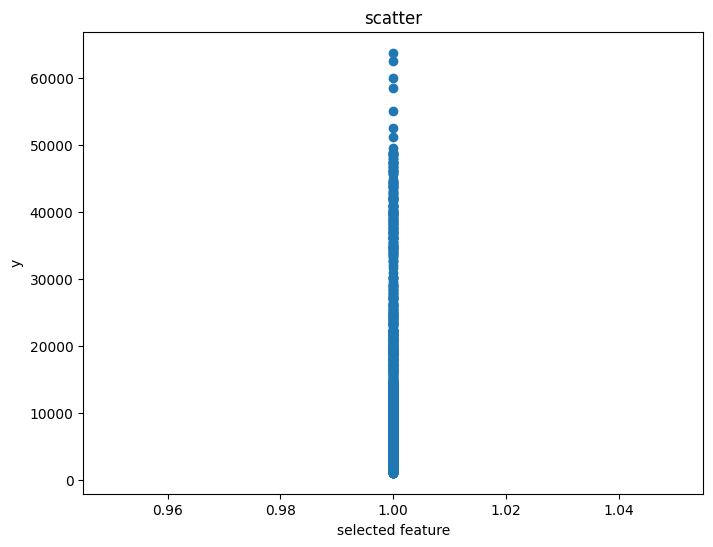

In [7]:
def polynomial_regression(degree, x, y):
    poly_reg = PolynomialFeatures(degree=degree)
    x_poly = poly_reg.fit_transform(x)

    model = LinearRegression()
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
    mse_scores = -cross_val_score(model, x_poly, y, cv=cv, scoring='neg_mean_squared_error')

    return np.mean(mse_scores)

degree = 1
mse = polynomial_regression(degree, x, y)
print('mse:', mse)

poly_reg = PolynomialFeatures(degree=degree)
x_poly = poly_reg.fit_transform(x)

feature_index = 0

plt.figure(figsize=(8, 6))
plt.scatter(x_poly[:, feature_index], y)
plt.xlabel('selected feature')
plt.ylabel('y')
plt.title('scatter')
plt.show()


R squared error :  0.9990374375362044
Mean Absolute Error :  243.02518430044327


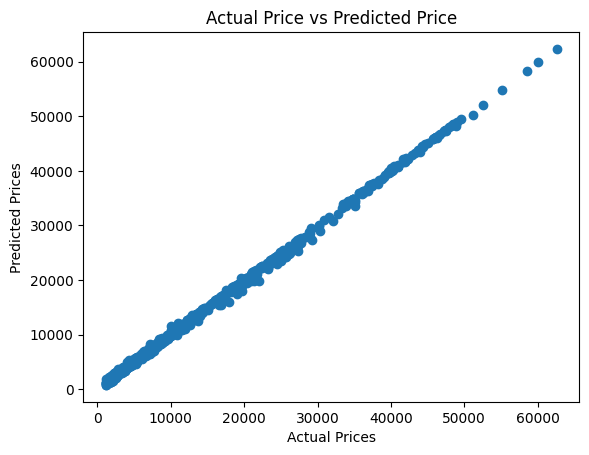

MSE test=  2861.969267727903
R2 test=  0.8146208627364756


In [8]:
best_degree = 2
x_poly = PolynomialFeatures(degree=best_degree).fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.3, random_state=42)

XB = XGBRegressor()
XB.fit(x_train, y_train)
y_pred_train = XB.predict(x_train)
score_1 = metrics.r2_score(y_train, y_pred_train)
score_2 = metrics.mean_absolute_error(y_train, y_pred_train)
print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

plt.scatter(y_train, y_pred_train)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show()

y_pred_test = XB.predict(x_test)
mse = metrics.mean_absolute_error(y_test, y_pred_test)
r2 = metrics.r2_score(y_test, y_pred_test)
print("MSE test= ", mse)
print('R2 test= ', r2)